#Import All Necessary Packages

In [ ]:
import pandas as pd # Importing the Basic Packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##Importing and loading the DataFrame

In [ ]:
df=pd.read_csv("players_20.csv") 
df.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


##Basic information checking

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
df.columns # checking the columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

##Checking the Null values

In [ ]:
df.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

#EDA (Exploratory Data Analysis and Feature Engineering)

In [ ]:
df.describe() # Statastical analysis

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

##Removing the Unwanted And unrelated columns like Id,name,dob etc.

In [ ]:
df = df[['age', 'height_cm', 'weight_kg', 'overall', 'potential',
'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
'skill_moves', 'release_clause_eur', 'team_jersey_number',
'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
'gk_positioning', 'attacking_crossing', 'attacking_finishing',
'attacking_heading_accuracy', 'attacking_short_passing',
'attacking_volleys', 'skill_dribbling', 'skill_curve',
'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
'movement_reactions', 'movement_balance', 'power_shot_power',
'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
'mentality_aggression', 'mentality_interceptions',
'mentality_positioning', 'mentality_vision', 'mentality_penalties',
'mentality_composure', 'defending_marking', 'defending_standing_tackle',
'defending_sliding_tackle', 'goalkeeping_diving',
'goalkeeping_handling', 'goalkeeping_kicking',
'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [ ]:
df.shape

(18278, 60)

In [ ]:
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
df.isnull().sum() #Checking the Null Values

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
international_reputation          0
weak_foot                         0
skill_moves                       0
release_clause_eur             1298
team_jersey_number              240
contract_valid_until            240
nation_jersey_number          17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                     16242
gk_handling                   16242
gk_kicking                    16242
gk_reflexes                   16242
gk_speed                      16242
gk_positioning                16242
attacking_crossing                0
attacking_finishing         

##Filling Null Values with the Mean

In [ ]:
df = df.fillna(df.mean()) # Filling Null values with mean

In [ ]:
df.isnull().sum() #Checking the Null Values

age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dr

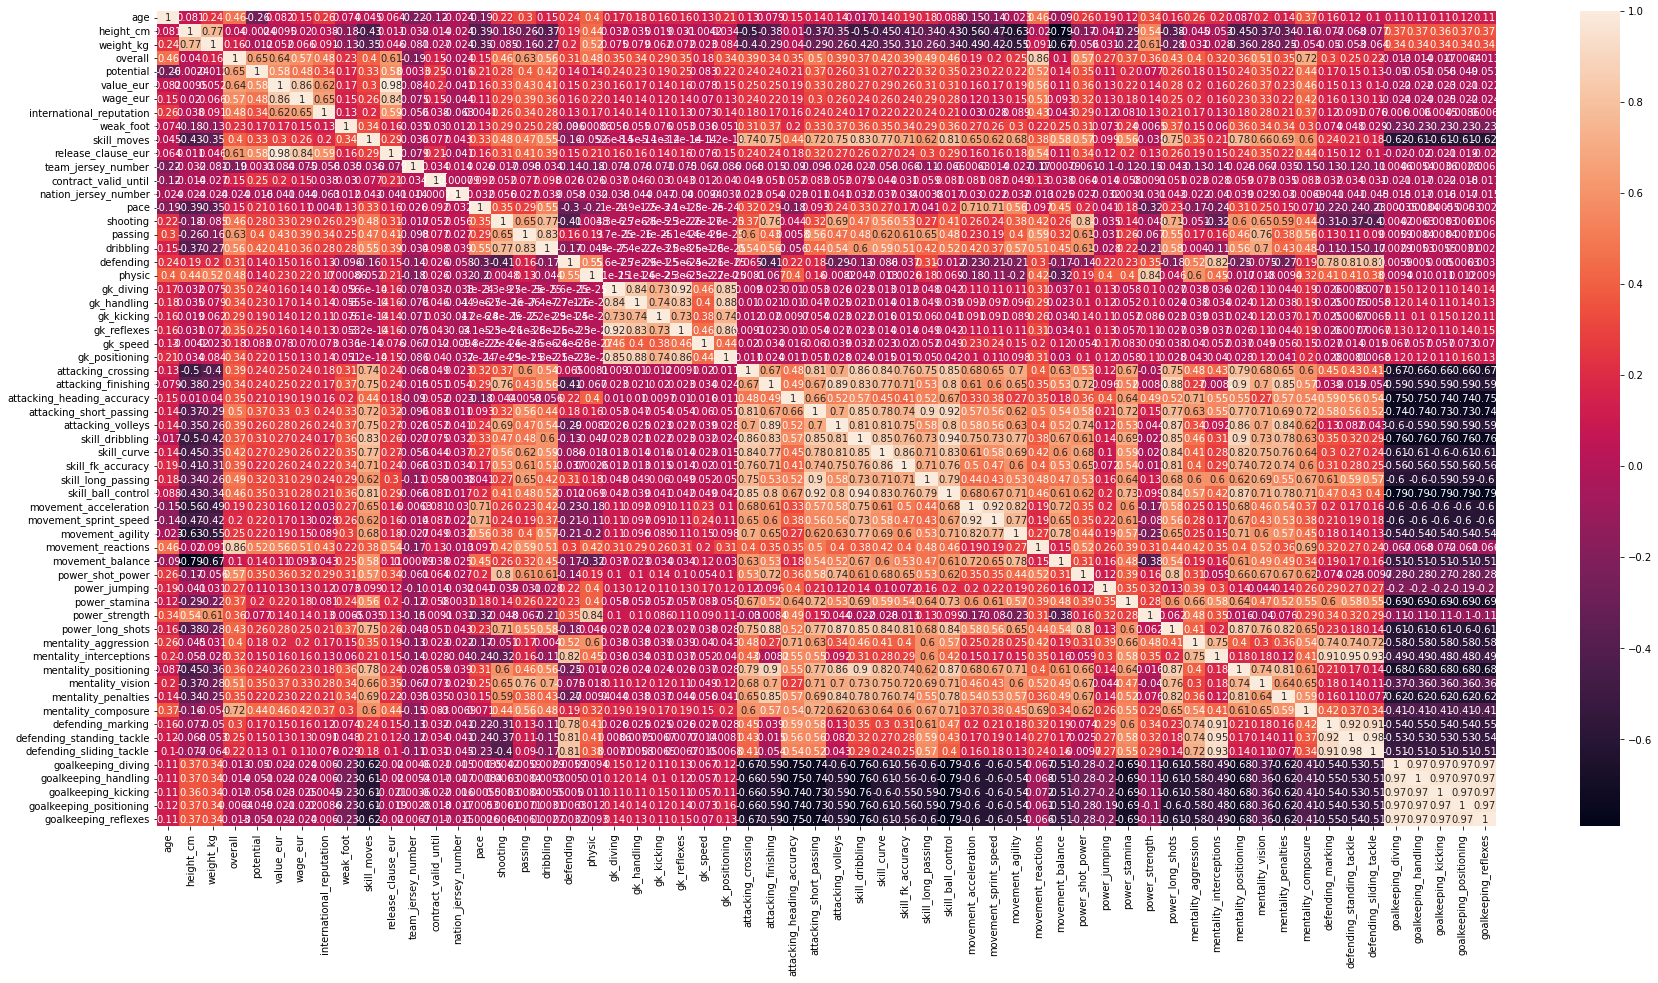

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##Feature engineering and scaling

In [ ]:
from sklearn import preprocessing # Scaling using MinMaxScaler()
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

##PCA (Principle Component Analysis)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
m = pd.DataFrame(pca.fit_transform(X_norm))

In [ ]:
m.head() # Reduced daframe

,0,1
0,-1.862262,-1.173054
1,-1.719352,-1.061111
2,-1.731313,-1.316372
3,1.839711,-0.284614
4,-1.647686,-1.149565


#MODEL BUILDING

##1) K-Means model for Clustering

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter= 300, n_init=10, random_state=0)
    kmeans.fit(m)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss # Within cluster sum of squares

[19192.539573048234,
 8983.35489886507,
 4719.878454858015,
 2977.041690211805,
 2250.5950980391412,
 1817.2833506990346,
 1587.9376368000803,
 1398.126676259178,
 1238.978011762686,
 1092.937735334391]

##Finding the number of clusters using Elbow method

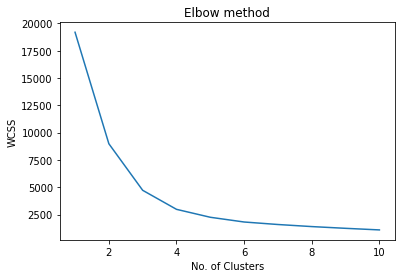

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# k=3 (k=no.of clusters)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter= 300, n_init=10, random_state=0)
y_predict = kmeans.fit_predict(m)
y_predict

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

## Visualization of Clusters

In [ ]:
x[y_predict == 0]

array([[ 27., 193.,  92., ...,  13.,  11.,  11.],
       [ 28., 187.,  89., ...,   7.,  13.,   5.],
       [ 28., 168.,  72., ...,  10.,   7.,  10.],
       ...,
       [ 19., 186.,  75., ...,  10.,   6.,  14.],
       [ 18., 185.,  74., ...,  13.,  13.,  13.],
       [ 26., 182.,  78., ...,  14.,   9.,  10.]])

In [ ]:
x[y_predict == 0,1]

array([193., 187., 168., ..., 186., 185., 182.])

In [ ]:
kmeans.cluster_centers_

array([[-0.1287628 ,  0.51095811],
       [ 2.0939045 , -0.25675622],
       [-0.40514957, -0.47642956]])

In [ ]:
kmeans.cluster_centers_[:,0]

array([-0.1287628 ,  2.0939045 , -0.40514957])

In [ ]:
kmeans.cluster_centers_[:,1]

array([ 0.51095811, -0.25675622, -0.47642956])

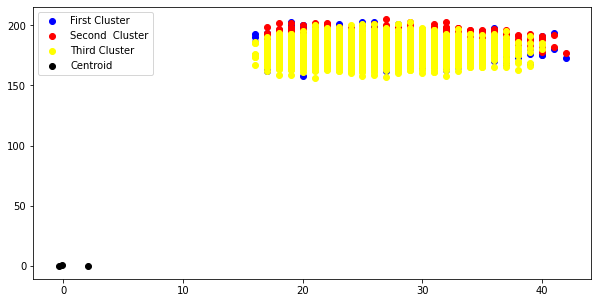

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x[y_predict == 0,0], x[y_predict == 0,1],c='blue',label='First Cluster')
plt.scatter(x[y_predict == 1,0], x[y_predict == 1,1],c='red',label='Second  Cluster')
plt.scatter(x[y_predict == 2,0], x[y_predict == 2,1],c='yellow',label='Third Cluster')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='Centroid')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(m,kmeans.labels_)
sil_score

0.4774332370609949

#The Silhouette_score is **0.47733** We can say that clustering is Done satisfactorily 